In [ ]:

# 1. IMPORT NECESSARY LIBRARIES


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

In [ ]:

# 2. LOAD DATASET


df = pd.read_csv("SeoulBikeData.csv", encoding="latin1")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (8760, 14)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:

# 3. DATA CLEANING & CHECKS

# Missing values count
print("\nMissing Values:\n", df.isnull().sum())

# Duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
 Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Duplicate Rows: 0


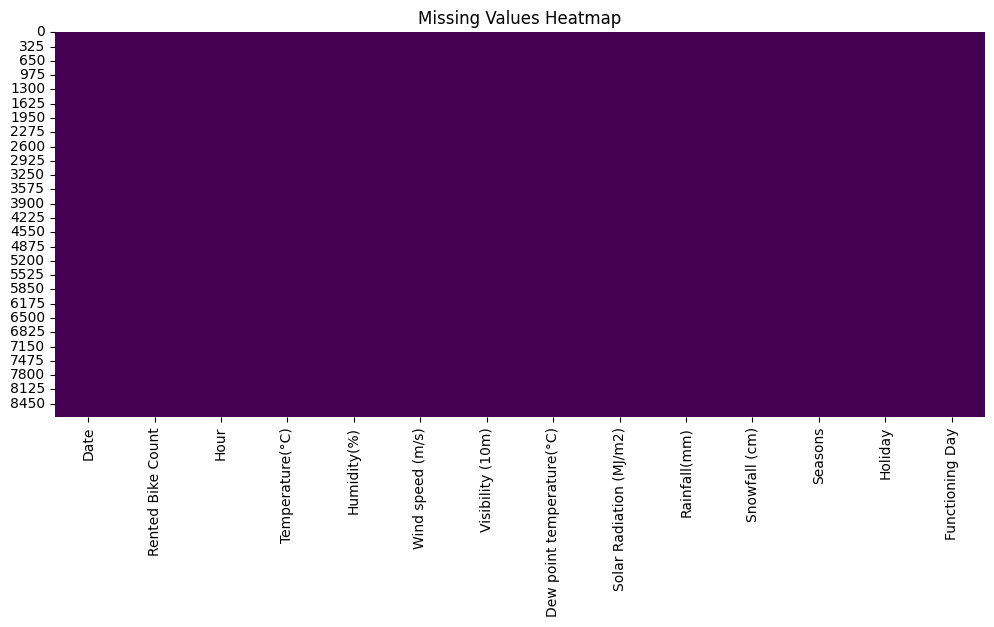

In [ ]:

#
# 4. MISSING VALUES HEATMAP
#

plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:

# 5. DROP DATE COLUMN


df_model = df.drop(["Date"], axis=1)

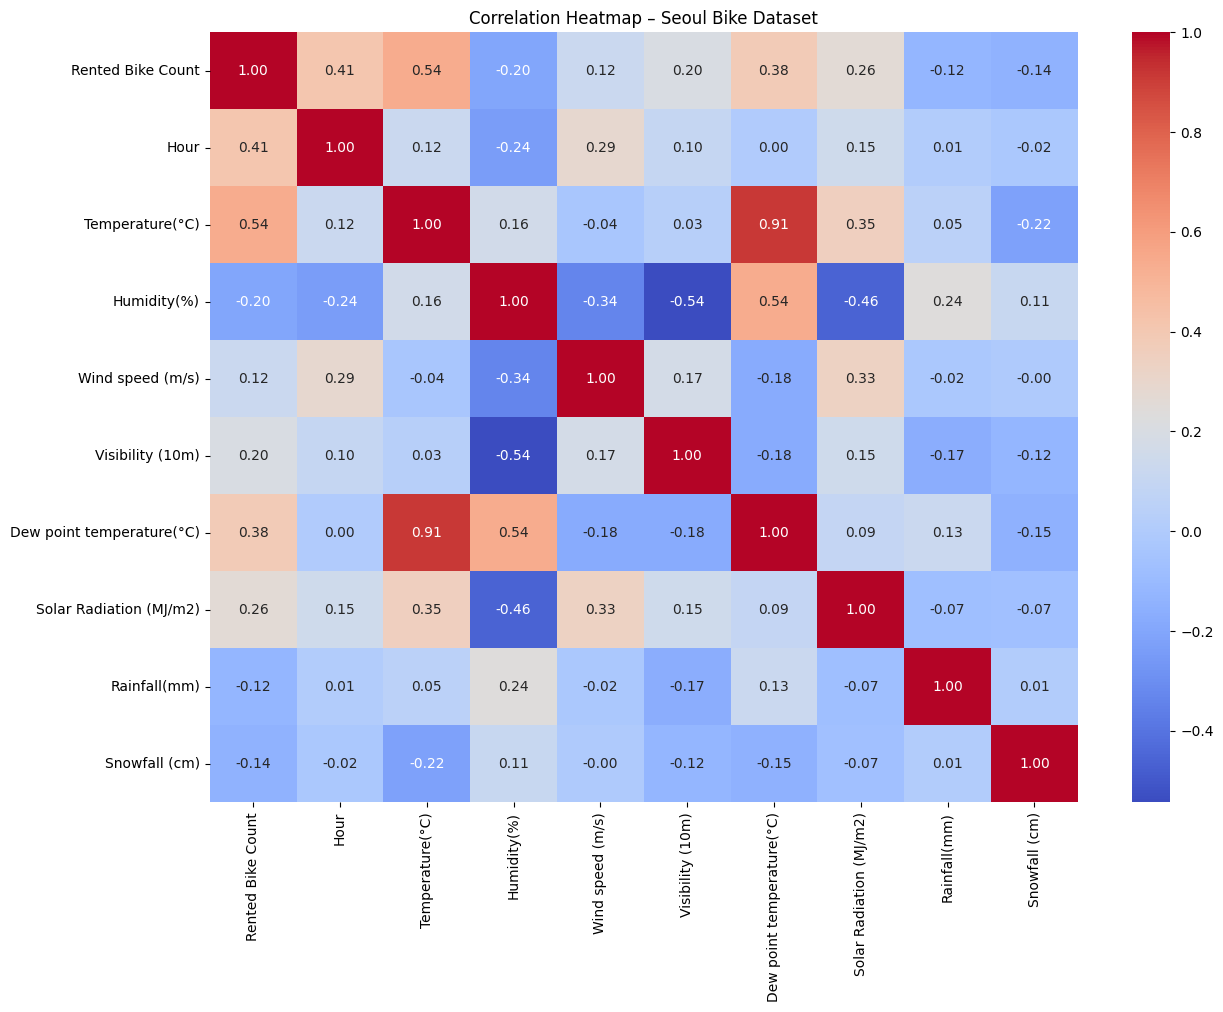


Correlation with Target Variable:
Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64


In [ ]:

# 6. CORRELATION HEATMAP


numeric_df = df_model.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap – Seoul Bike Dataset")
plt.show()

print("\nCorrelation with Target Variable:")
print(corr_matrix["Rented Bike Count"].sort_values(ascending=False))

In [ ]:
#
# 7. FEATURE & TARGET SPLIT
#

X = df_model.drop("Rented Bike Count", axis=1)
y = df_model["Rented Bike Count"]

In [ ]:
# 8. ENCODE CATEGORICAL COLUMNS


label_encoders = {}

for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [ ]:

# 9. TRAIN TEST SPLIT


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:


# 10. FEATURE SCALING


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# =========================================
# 11. MODEL TRAINING


# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_pred = lin_reg.predict(X_test_scaled)

In [ ]:
# Decision Tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled, y_train)
dt_pred = dt_reg.predict(X_test_scaled)

In [ ]:
# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
rf_pred = rf_reg.predict(X_test_scaled)

In [ ]:
#
# 12. MODEL EVALUATION (REGRESSION)
#

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model("Linear Regression", y_test, lin_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)


Linear Regression Performance
MAE : 326.83271272508966
MSE : 190700.1794866839
RMSE: 436.6923167250414

Decision Tree Performance
MAE : 191.0076103500761
MSE : 111095.01750380518
RMSE: 333.30919204817195

Random Forest Performance
MAE : 145.01658675799086
MSE : 57436.57975171232
RMSE: 239.65929932241795


In [ ]:

# 13. CLASSIFICATION VIEW (HIGH DEMAND)

threshold = 500

y_test_bin = np.where(y_test >= threshold, 1, 0)
lin_bin = np.where(lin_pred >= threshold, 1, 0)
dt_bin = np.where(dt_pred >= threshold, 1, 0)
rf_bin = np.where(rf_pred >= threshold, 1, 0)

def classification_metrics(name, y_true, y_pred):
    print(f"\n{name} Classification Metrics")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

classification_metrics("Linear Regression", y_test_bin, lin_bin)
classification_metrics("Decision Tree", y_test_bin, dt_bin)
classification_metrics("Random Forest", y_test_bin, rf_bin)


Linear Regression Classification Metrics
Accuracy : 0.7743531202435312
Precision: 0.7050770108385624
Recall   : 0.9420731707317073
F1 Score : 0.8065252854812398
Confusion Matrix:
 [[ 799  517]
 [  76 1236]]

Decision Tree Classification Metrics
Accuracy : 0.9052511415525114
Precision: 0.9201581027667984
Recall   : 0.8871951219512195
F1 Score : 0.9033760186263097
Confusion Matrix:
 [[1215  101]
 [ 148 1164]]

Random Forest Classification Metrics
Accuracy : 0.926179604261796
Precision: 0.9222054380664653
Recall   : 0.930640243902439
F1 Score : 0.9264036418816388
Confusion Matrix:
 [[1213  103]
 [  91 1221]]


In [ ]:
#
# 14. ACCURACY PERCENTAGE
#

def accuracy_percentage(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    return 100 - (mae / np.mean(y_true) * 100)

lin_acc = accuracy_percentage(y_test, lin_pred)
dt_acc = accuracy_percentage(y_test, dt_pred)
rf_acc = accuracy_percentage(y_test, rf_pred)

print("\nAccuracy Comparison:")
print("Linear Regression:", lin_acc)
print("Decision Tree    :", dt_acc)
print("Random Forest    :", rf_acc)


Accuracy Comparison:
Linear Regression: 53.3001689273143
Decision Tree    : 72.70767952641
Random Forest    : 79.27915462357032


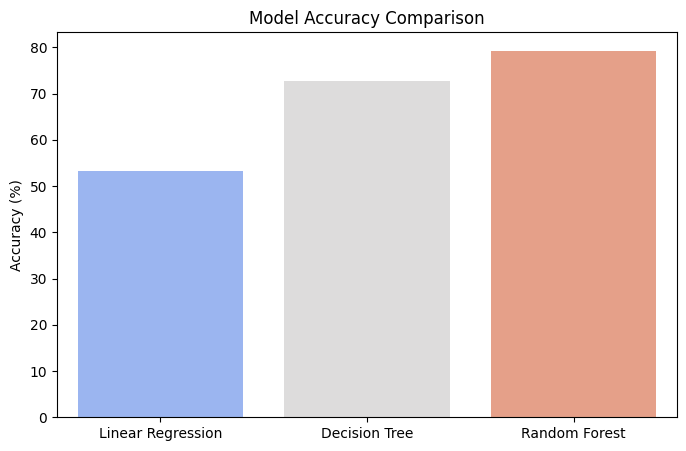

In [ ]:
# 15. MODEL COMPARISON BAR PLOT


models = ["Linear Regression", "Decision Tree", "Random Forest"]
accuracies = [lin_acc, dt_acc, rf_acc]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.show()

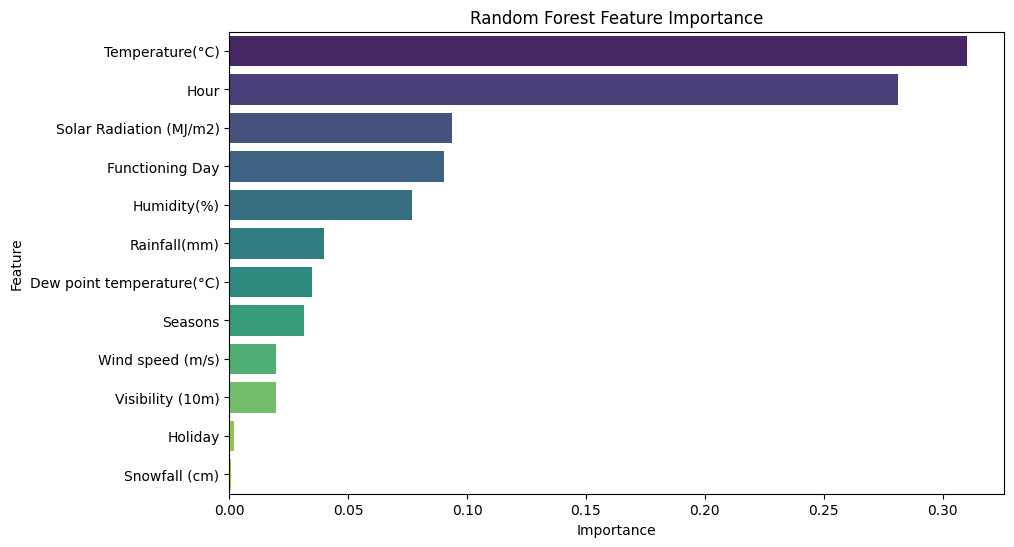

In [ ]:

# 17. RANDOM FOREST FEATURE IMPORTANCE


feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_reg.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance,
    palette="viridis"
)
plt.title("Random Forest Feature Importance")
plt.show()

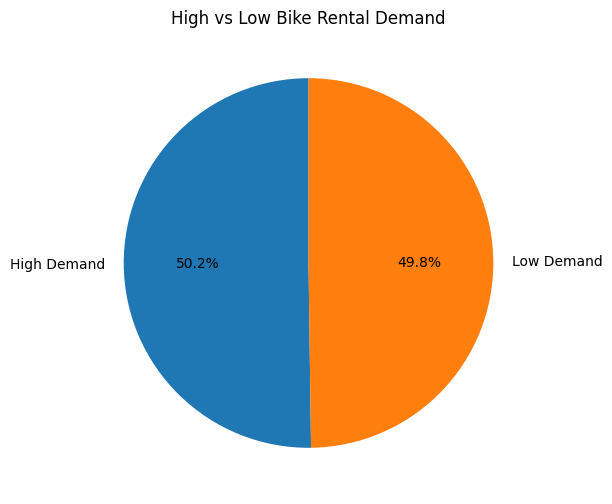

In [ ]:
threshold = 500  # same threshold you used earlier

df["Demand Level"] = np.where(df["Rented Bike Count"] >= threshold,
                              "High Demand",
                              "Low Demand")

demand_counts = df["Demand Level"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    demand_counts,
    labels=demand_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("High vs Low Bike Rental Demand")
plt.show()

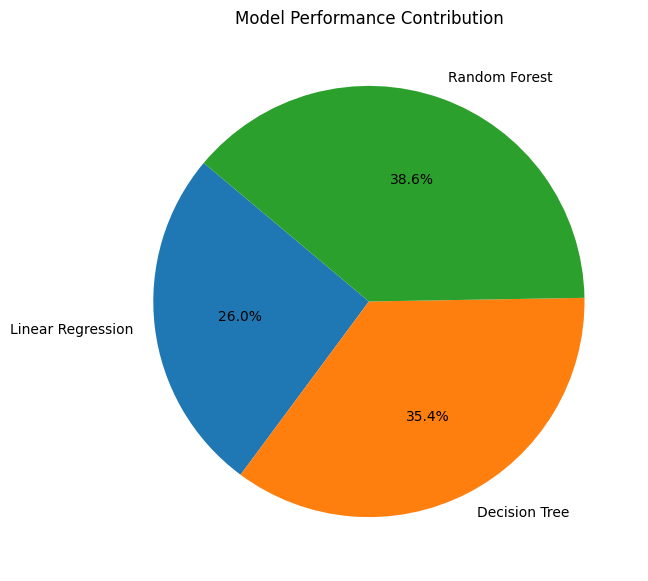

In [ ]:
model_scores = {
    "Linear Regression": lin_acc,
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc
}

plt.figure(figsize=(7,7))
plt.pie(
    model_scores.values(),
    labels=model_scores.keys(),
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Model Performance Contribution")
plt.show()

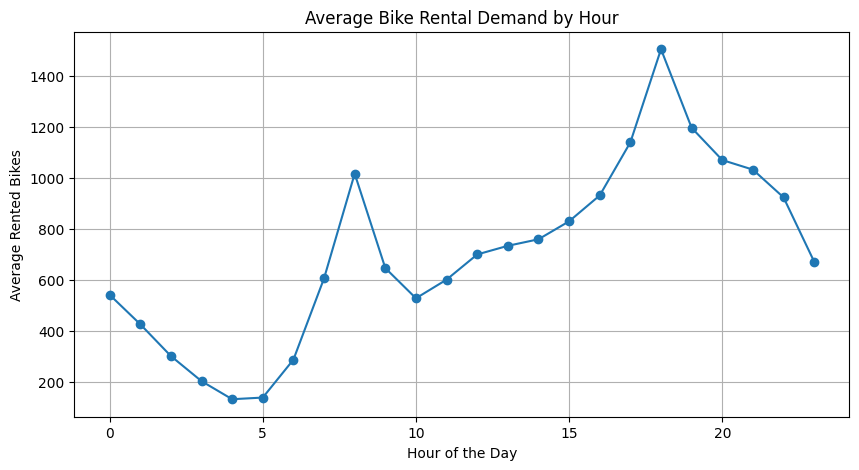

In [ ]:
hourly_demand = df.groupby("Hour")["Rented Bike Count"].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_demand.index, hourly_demand.values, marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Rented Bikes")
plt.title("Average Bike Rental Demand by Hour")
plt.grid(True)
plt.show()

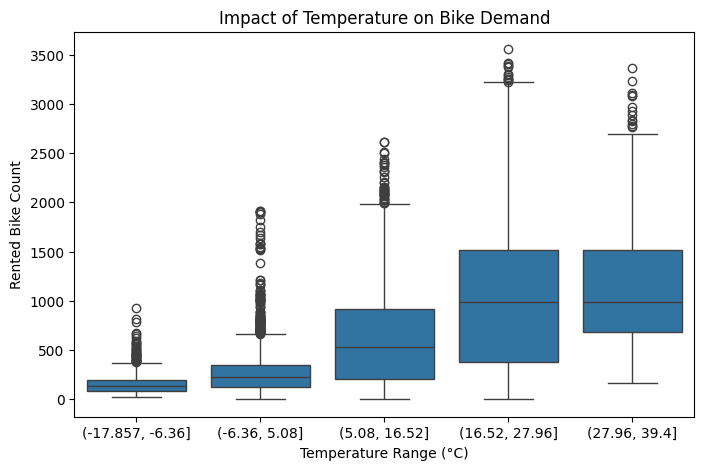

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x=pd.cut(df["Temperature(°C)"], bins=5),
    y=df["Rented Bike Count"]
)
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Rented Bike Count")
plt.title("Impact of Temperature on Bike Demand")
plt.show()

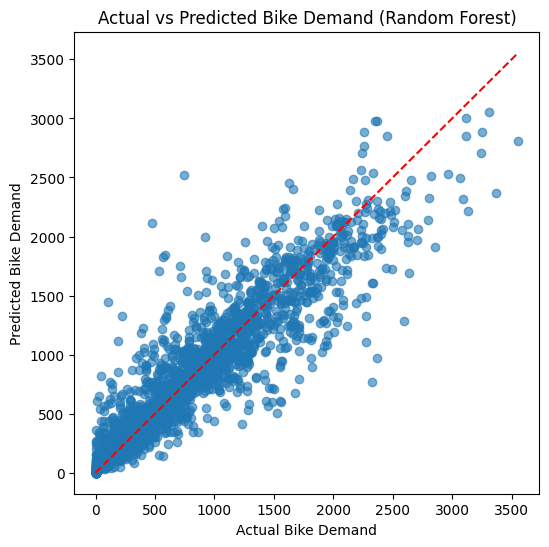

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--"
)
plt.xlabel("Actual Bike Demand")
plt.ylabel("Predicted Bike Demand")
plt.title("Actual vs Predicted Bike Demand (Random Forest)")
plt.show()

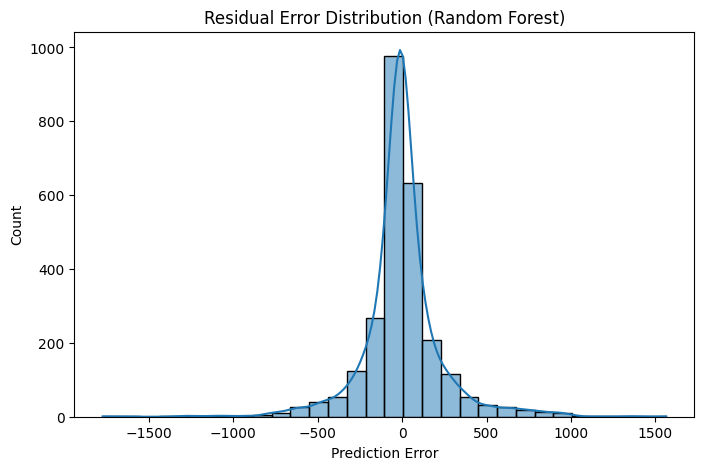

In [ ]:
residuals = y_test - rf_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Prediction Error")
plt.title("Residual Error Distribution (Random Forest)")
plt.show()

In [ ]:
#
# 18. USER INPUT PREDICTION (INTERACTIVE)
#

def predict_bikes(model, input_data):
    scaled = scaler.transform(input_data)
    return int(model.predict(scaled)[0])

inputs = {col: widgets.FloatText(description=col) for col in X.columns}

model_choice = widgets.Dropdown(
    options=["Linear Regression", "Decision Tree", "Random Forest"],
    description="Model"
)

predict_btn = widgets.Button(description="Predict Bike Demand")
output = widgets.Output()

def on_predict(b):
    with output:
        clear_output()
        values = np.array([inputs[col].value for col in X.columns]).reshape(1, -1)

        if model_choice.value == "Linear Regression":
            model = lin_reg
        elif model_choice.value == "Decision Tree":
            model = dt_reg
        else:
            model = rf_reg

        prediction = predict_bikes(model, values)
        print("Predicted Rented Bikes:", prediction)

predict_btn.on_click(on_predict)

display(*inputs.values(), model_choice, predict_btn, output)

FloatText(value=0.0, description='Hour')

FloatText(value=0.0, description='Temperature(°C)')

FloatText(value=0.0, description='Humidity(%)')

FloatText(value=0.0, description='Wind speed (m/s)')

FloatText(value=0.0, description='Visibility (10m)')

FloatText(value=0.0, description='Dew point temperature(°C)')

FloatText(value=0.0, description='Solar Radiation (MJ/m2)')

FloatText(value=0.0, description='Rainfall(mm)')

FloatText(value=0.0, description='Snowfall (cm)')

FloatText(value=0.0, description='Seasons')

FloatText(value=0.0, description='Holiday')

FloatText(value=0.0, description='Functioning Day')

Dropdown(description='Model', options=('Linear Regression', 'Decision Tree', 'Random Forest'), value='Linear R…

Button(description='Predict Bike Demand', style=ButtonStyle())

Output()

In [ ]:
from google.colab import files
files.upload()


{}